# 이불 밖은 위험해!
### &nbsp; > 코로나로 집밖에 나가지 않는 사람들, 우리는 어떤 소비를 할까?
<br>


# 목차
---

<br>



## 서론
<br>

 - ‘코로나’라는 큰 이벤트로 인해 전년도와 소비 트렌드가 상이하게 다른 모습을 보여주고 있습니다. 때문에 ‘코로나’는 앞으로의 소비트렌드의 핵심 키워드가 될 것이라고 추측됩니다.
 
 <br>
 
- 현재는 코로나 바이러스가 소강상태이지만 앞으로의 전망이 어떨지 감히 예측하지 못하는 상황입니다. 저희는 현 상황에서 소비자의 패턴을 다양한 시각으로 이전 트렌드와 비교해보고, 데이터 간의 관계를 분석하여 소비 동향을 조심스럽게 예측해보려고 합니다.

 <br>
 
- 감정적 데이터(소비자의 감정 변화에 따른 소비 패턴 분석)와 객관적 데이터(객관적인 자료에 따른 소비 패턴 분석)을 사용하여 새로운 지표를 제시하고, 코로나 확진자 발생 추이와 비교하여 유의미한 인사이트를 도출해내는 것이 목표입니다.


<br>

## 본론

<br>

### 1. 코로나로 인해 변화한 소비 트렌드 분석 및 새로운 지표 제시
- 먼저, 다양한 관점으로 코로나 발생 이전과 달라진 소비 트렌드 동향을 살펴보려고 합니다.
- 살펴본 소비 트렌드 동향을 종합하여, 새로운 지표를 제시하려고 합니다.

<br>

#### 1-1. 배달 시간대의 변화에 따른 소비자 소비 패턴 분석
- 코로나에 대한 불안감 때문에 홈코노미족이 늘면서, 낮에도 배달이 많아질 것으로 예상됩니다.

In [35]:
import os
from os import listdir
from os.path import isfile, join
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pyecharts import  Timeline, Overlap, Bar, Line, EffectScatter
from pyecharts import configure
import random
import math

# !pip install konlpy
# !pip install bs4
# !pip install pyecharts==0.5.11

import requests
from bs4 import BeautifulSoup
import re
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm  # 폰트 관련 용도
from matplotlib import rc
import numpy as np
from datetime import datetime
import seaborn as sns
import warnings
from urllib.request import urlopen
import json
import sqlite3
import datetime
from dateutil.relativedelta import relativedelta

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

path = os.getcwd()

In [2]:
# 시간대별 배달 구매데이터 
# 출처 : kt 통신 빅데이터 플랫폼 https://bdp.kt.co.kr/invoke/SOKBP2603/?goodsCode=KGUTIMEORDER

delivery_csv = pd.read_csv(path+"\\시간-지역별 배달 주문건수.csv",
                           names=["날짜","시간","지역","시군구","소비건수"])
delivery_csv_copy = delivery_csv.copy()
delivery_csv_copy

,날짜,시간,지역,시군구,소비건수
0,2019-07-18,0,강원도,속초시,1
1,2019-07-18,0,경기도,고양시 일산동구,15
2,2019-07-18,0,경기도,고양시 일산서구,6
3,2019-07-18,0,경기도,의정부시,65
4,2019-07-18,0,경기도,파주시,2
...,...,...,...,...,...
381063,2020-08-31,23,전라북도,군산시,38
381064,2020-08-31,23,제주특별자치도,서귀포시,13
381065,2020-08-31,23,충청남도,서산시,22
381066,2020-08-31,23,충청북도,제천시,7



<br>

#### 기간별 하루의 배달 시간대의 변화에 따른 소비자 소비 패턴 분석
-  2019년 7월 18일부터 2020년 8월 31일까지 전국 지역별 배달 소비건수 데이터

In [3]:
# 같은 월별, 같은 시간대 데이터들끼리 묶어 분류

new_date = []
for date in delivery_csv_copy['날짜']:
    new_date.append(date[:7])
delivery_csv_copy['날짜'] = new_date
delivery_csv_copy = delivery_csv_copy[delivery_csv_copy['날짜'] != '2019-07']
month_cat = delivery_csv_copy['날짜'].unique()
time_cat = delivery_csv_copy['시간'].unique()

In [4]:
# 날짜별 소비건수 계산
splited_sum_list = []
splited_df_list =[]
count_list=[]
for date in month_cat:
    delivery_csv_df = delivery_csv_copy[delivery_csv_copy['날짜']== date]
    temp_sum_list = []
    temp_df_list = []
    count = 0
    for time in time_cat:
        splited_df = delivery_csv_df[delivery_csv_df['시간'] == time ]
        temp_sum_list.append(splited_df['소비건수'].sum())
        new_df = pd.DataFrame({'날짜' : [splited_df.iloc[0][0]],
                              ' 시간' : [splited_df.iloc[0][1]], 
                              '소비건수' : [splited_df['소비건수'].sum()]})
        temp_df_list.append(new_df)
    splited_sum_list.append(temp_sum_list)
    splited_df_list.append(pd.concat(temp_df_list,ignore_index=True))
lst_avg_lst =[]
for month_cnt in range(len(splited_sum_list[0])):
    lst_sum =[]
    for date_cnt in range(len(splited_sum_list)):
        lst_sum.append(splited_sum_list[date_cnt][month_cnt])
    lst_sum = math.trunc(sum(lst_sum)/13)
    lst_avg_lst.append(lst_sum)
print(lst_avg_lst)

[15061, 8050, 3502, 1450, 985, 711, 696, 793, 1201, 3430, 12475, 51132, 64562, 53332, 44053, 40829, 48269, 82212, 127407, 126034, 94513, 70928, 50676, 30382]


In [5]:
# 같은 일별 데이터들끼리 묶어 분류
# 본론 2번에서 일별로 비교할 것이기 때문에, 일별 데이터 분류를 하려고 합니다.

delivery_date_dfs = [] # 일별로 시리즈 저장

delivery_date = delivery_csv['날짜'].unique()
for i in delivery_date:
    delivery_date_dfs.append(delivery_csv[delivery_csv['날짜']==i])

delivery_date_dfs = delivery_date_dfs[14:]

In [6]:
delivery_date_sum = [] # 일별로 소비건수 저장
month = [31, 30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31]
month_sum_list = [31, 61, 92, 122, 153, 184, 213, 244, 274, 305, 335, 366, 397]

cnt = 0
for x in range(month_sum_list[cnt]):
    for i in delivery_date_dfs:
        delivery_date_sum.append(sum(list(i['소비건수'])))
    
    cnt += 1
    
delivery_date_sum_lst = [delivery_date_sum[:month_sum_list[0]]]
for i in range(1, 13):
    delivery_date_sum_lst.append(delivery_date_sum[month_sum_list[i-1]:month_sum_list[i]])

In [7]:
delivery_month_sum = []
for i in range(13):
    delivery_month_sum.append(sum(delivery_date_sum_lst[i])) # 월별 전체 건수
delivery_month_sum_lst = []
for i in delivery_month_sum:
    delivery_month_sum_lst.append(i/sum(delivery_month_sum)*100) # 월별 전체 건수 평균
print(delivery_month_sum_lst)

[5.401541372657622, 5.405626442591795, 6.357184184355252, 6.863666967968028, 7.505978326892072, 7.218689194948843, 7.732510279592564, 8.357155358256927, 8.258084176325125, 8.962091621694523, 8.676169670414746, 9.03515342690834, 10.226148977394162]


In [8]:
configure(global_theme='dark')

attr1 = ["19.0{}.".format(i) for i in range(8, 10)] + ["19.{}.".format(i) for i in range(10, 13)]
attr2 = ["20.0{}.".format(i) for i in range(1, 9)]
attr = attr1 + attr2

line = Line("전체 소비건수에 대한 월별 소비건수 %", title_top=15, title_pos='50')
line.add("평균값", attr, delivery_month_sum_lst, legend_top='20', legend_pos="80%")
line

- 월별로 보았을 때, 코로나 이전에도 꾸준히 증가하는 추세였습니다.
- 위 그래프가 소비 트렌드와 코로나의 관계성을 판단하기 어려워, 월별/ 시간별 데이터를 시각화했습니다.

In [9]:
configure(global_theme='chalk')

line = Line()
line.add("배달건수 평균", time_cat, lst_avg_lst)
timeline = Timeline(is_auto_play=True, timeline_bottom=0)
cnt = 0
for month_category in month_cat:
    bar = Bar("월별 / 시간별 배달 건수 그래프","2019.08.~2020.08.", title_top=3)
    bar.add("배달건수", time_cat, splited_sum_list[cnt],
              is_datazoom_show=True,
              datazoom_type="inside",
              datazoom_range=[10, 30])
    overlap = Overlap()
    overlap.add(bar)
    overlap.add(line)
    timeline.add(overlap, month_category)
    cnt+=1

timeline

- 코로나가 확산되기 시작한 2월을 기점부터 사람들이 평균 이상의 배달을 시키는 것을 확인할 수 있습니다.
- 평소에 배달을 잘 시켜먹지 않는 점심시간 때에도 배달 건수가 크게 증가하는 것을 보아, 코로나에 대한 불안감으로 외식보다는 배달 음식을 선호하게 되었다는 것을 보여줍니다.


<br>

#### 1-2. 서치트랜드 데이터를 바탕으로 항목별로 분류하여 소비자 관심 분석
-  2019년 8월 1일부터 2020년 10월 21일까지 네이버 데이터랩 키워드 데이터

In [10]:
# 급상승 검색어에서 스크래핑하여 가져온 데이터입니다.
# 출처 : 네이버 데이터랩 - 급상승 검색어 스크래핑 https://datalab.naver.com/keyword/realtimeList.naver

keyword_csv = pd.read_csv(path + "\\search_trend.csv", encoding ='cp949',names = ["날짜","시간","순위","키워드"])
keyword_csv = keyword_csv.dropna()
keyword_month = list(keyword_csv['날짜'].unique())
time_cat = list(keyword_csv['시간'].unique())
keyword_csv.head()

,날짜,시간,순위,키워드
0,20190801.0,0.0,1.0,김나희
2,20190801.0,0.0,2.0,정보석
4,20190801.0,0.0,3.0,엑시트 쿠키영상
6,20190801.0,0.0,4.0,박일
8,20190801.0,0.0,5.0,초계국수


In [11]:
# 월별 데이터 만들기
date_offline = keyword_csv.sort_values('날짜')
date_offline['날짜'] = date_offline['날짜'].astype(str)

last_year_list = []
this_year_list = []
date_list = []
last_year_month = 201908
this_year_month = 202001
for count in range(15):
    if count<5:
        temp = last_year_month + count
        date_list.append(str(temp))
        last_year_list.append(str(temp))
    else:
        temp = this_year_month+count-5
        date_list.append(str(temp))
        this_year_list.append(str(temp))
dataframe_list =[]
for data in date_list:
    data_contain = date_offline['날짜'].str.contains(data)
    subset_df = date_offline[data_contain]
    dataframe_list.append(subset_df)

In [12]:
#월별 키워드 등장 횟수 계산

from collections import Counter
month_keyword_rank_list = [] # 월별 키워드 랭크 리스트(키워드, 횟수)

for df in dataframe_list:
    counts = Counter(df['키워드'])
    counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    counts = pd.DataFrame(counts[:20], columns=['키워드', '빈도수'])
    month_keyword_rank_list.append(counts)
    
month_keyword_list = []
month_keyword_value_list = []
for keyword_rank in month_keyword_rank_list:

    temp_keyword_rank = list(keyword_rank['키워드'])
    temp_keyword_value = list(keyword_rank['빈도수'])
    month_keyword_list.append(temp_keyword_rank)
    month_keyword_value_list.append(temp_keyword_value)

In [13]:
from pyecharts import WordCloud
configure(global_theme='macarons')
timeline = Timeline(is_auto_play=True, timeline_bottom=0)
cnt = 0
for month_category in date_list:
    name = month_keyword_list[cnt]
    value = month_keyword_value_list[cnt]
    wordcloud = WordCloud(width=820, height=520)
    wordcloud.add("", name, value, word_size_range=[20, 100])
    overlap = Overlap()
    overlap.add(wordcloud)
    timeline.add(overlap, month_category)
    cnt+=1
timeline

- 월별 키워드 데이터를 본 결과, 코로나가 처음 시작한 2~3월에는 검색 유입량이 많았던 것을 알 수 있습니다.
- 하지만 갈수록 경각심과 함께 코로나에 대한 관심도 떨어진 것을 확인할 수 있습니다.

In [14]:
# 하루중 해당 키워드가 미친 영향력(전체 : 100%)
# wordcloud 중에서 코로나 관련 hot 키워드들만 선별하였습니다.
naver_keyword_lst = ["코로나","코로나19","대구코로나","마스크알리미","코로나항체","사회적거리두기","코로나라이브"]
naver_data_list = []

# 네이버 데이터랩스에서 해당 키워드들로 검색하여
# 2019.08.01 ~ 2020.10.21까지 실시간 검색어에서의 영향력 데이터를 가져왔습니다.
# 출처 : https://datalab.naver.com/keyword/trendSearch.naver
for naver_keyword in naver_keyword_lst:
    df_naver = pd.read_excel(path+'\네이버 코로나 데이터\{}.xlsx'.format(naver_keyword),names=['날짜',f"{naver_keyword}"])
    df_naver = df_naver.drop([0,1,2,3,4,5])
    naver_data_list.append(df_naver)
days_lst = list(naver_data_list[0]["날짜"].unique())

In [15]:
# 각 키워드들의 날짜별 영향력 값들의 평균 구하기
naver_avg_lst = []
for x in range(len(naver_data_list[0])):
    temp_lst = []
    for y in range(0,6):
        tmp = naver_data_list[y].iloc[x][1]
        temp_lst.append(float(tmp))
    naver_avg_lst.append(sum(temp_lst)/6)

In [16]:
configure(global_theme='westeros')

line = Line("일별 코로나 관련 키워드 영향력",title_pos = 10 , title_top = 10)
attr = days_lst
v1 = naver_avg_lst
line.add("영향력", attr, v1,legend_top=18, is_datazoom_show=True, legend_pos="40%")
es = EffectScatter()
es.add("국내 첫 확진자", ['2020-01-20'], [0.04569333333333336], effect_scale=8)
es1 = EffectScatter()
es1.add("신천지 집단감염", ['2020-02-18'], [4.26475], effect_scale=8)
es2 = EffectScatter()
es2.add("제일사랑교회 집단감염", ['2020-08-12'], [4.293436666666675], effect_scale=8)
# line

overlap = Overlap()
overlap.add(line)
overlap.add(es)
overlap.add(es1)
overlap.add(es2)
overlap

- 국내 첫 확진자가 나온 뒤부터 '코로나' 관련 키워드의 유입량이 증가하기 시작했습니다.
- 가장 큰 이슈를 낳았던 2월 18일 '신천지 집단감염'과 8월 12일 '제일사랑교회 집단감염' 때 관련 키워드의 유입량이 급증한 것을 확인할 수 있습니다.
- 사람들의 코로나에 대한 두려움이 커질수록 키워드 유입량이 증가하고, 소강상태에 이를수록 키워드 유입량이 감소합니다.


<br>

#### 1-3. 뉴스 기사 키워드에 대한 유입량 데이터로 소비자 감정 분석
-  2020년 1월 1일부터 2020년 9월 6일까지 뉴스 기사 키워드에 대한 유입량 데이터

In [17]:
# 네이버 랭킹 뉴스

# 예전에 코로나 19 시각화를 위해 사용한 데이터가 있었습니다.
# 현재는 네이버 랭킹 뉴스 서비스가 종료되었지만, 1달 전에 스크래핑한 데이터셋을 사용하였습니다.
# 출처 : https://news.naver.com/main/ranking/popularDay.nhn?mid=etc&sid1=111

corona_news = pd.read_csv("./corona_news_count.csv",encoding = 'utf-8')
corona_news_df = pd.pivot_table(corona_news, values='date', index=['date'])
corona_news_df
new_news_df = corona_news_df[:244].copy()
news_days_list = list(new_news_df.index)

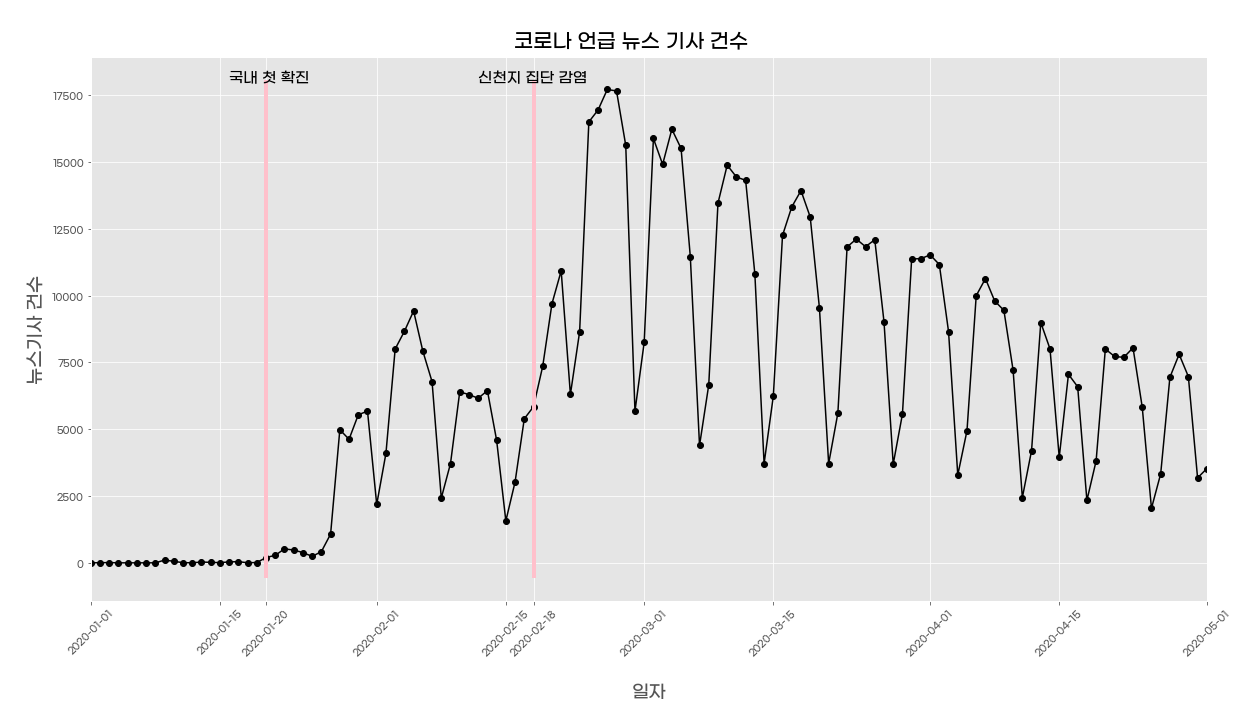

In [18]:
path_gmarket = './GmarketSansTTFMedium.ttf'
font_gmarket = fm.FontProperties(fname=path_gmarket, size=16)
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,10))
plt.plot(corona_news_df.index, corona_news_df, '-ok')
plt.plot([corona_news['date'][corona_news[corona_news['date']=='2020-01-20'].index[0]],
          corona_news['date'][corona_news[corona_news['date']=='2020-01-20'].index[0]]], 
         [-500, 18000], 
         lw=4, 
         c='pink')
plt.plot([corona_news['date'][corona_news[corona_news['date']=='2020-02-18'].index[0]],
          corona_news['date'][corona_news[corona_news['date']=='2020-02-18'].index[0]]],
         [-500, 18000],
         lw=4,
         c='pink')

fig.suptitle('\n코로나 언급 뉴스 기사 건수', fontproperties=font_gmarket, fontsize=20, position=(0.5, 0.95))
plt.annotate('국내 첫 확진',[corona_news['date'][corona_news[corona_news['date']=='2020-01-20'].index[0]-4], 18000],fontsize=15, fontproperties=font_gmarket)
plt.annotate('신천지 집단 감염',[corona_news['date'][corona_news[corona_news['date']=='2020-02-18'].index[0]-6],18000],fontsize=15, fontproperties=font_gmarket)

plt.xticks(['2020-01-01', '2020-01-15', '2020-01-20', '2020-02-01', '2020-02-15', '2020-02-18', '2020-03-01', '2020-03-15', '2020-04-01', '2020-04-15', '2020-05-01', '2020-05-15', '2020-06-01', '2020-06-15', '2020-07-01', '2020-07-15', '2020-08-01', '2020-08-15', '2020-09-01'],
           rotation=45, fontproperties=font_gmarket, fontsize=10)
plt.yticks(fontproperties=font_gmarket, fontsize=10)

plt.xlabel('\n일자', fontproperties=font_gmarket, fontsize=18)
plt.ylabel('\n뉴스기사 건수', fontproperties=font_gmarket, fontsize=18)
plt.xlim(0, '2020-05-01')

plt.show()

- 다음은 2020년 1월 1일부터 2020년 6월 1일까지 포스트 코로나가 시작되고 나서의 코로나를 언급한 뉴스 기사 건수입니다.
- 그래프 사이사이에 값이 떨어지는 것은 주말이기 때문에 기사를 많이 쓰지 않기 때문입니다.
- 흥미로운 부분은 국내 첫 확진자가 나오고 일정 기간이 지난 후에 기사화되기 시작했고, 두 번째 분기점에 영향을 미친 신천지 집단 감염 역시 일정 기간 후에 기사 건수가 급격하게 치솟는 것을 볼 수가 있습니다.


#### 1-4. 소비자 감정 변화에 따른 새로운 지표 제시.
-  각각의 데이터가 어떻게 값이 변화하는 지를 중점으로 보기 위해, 최대값 대비 상대비율을 각각 계산 후 각 그래프마다 함수값의 비중을 반영하여 합성하여 지표를 만듭니다.


In [19]:
# 배달스케일링

delivery_date_df_scale = delivery_date_dfs[153:]
delivery_date_sum = [] # 일별로 소비건수 저장

for i in delivery_date_df_scale:
    delivery_date_sum.append(sum(list(i['소비건수'])))
delivery_date_sum = list(np.array(delivery_date_sum)) # 지표 제작을 위해 크기를 조금 줄였습니다.

# 20200518 데이터가 비어있으므로, 5월 17일 데이터 값으로 채웠습니다.
delivery_date_add = delivery_date_sum[:137]
delivery_date_add.append(41220)
delivery_date_add += delivery_date_sum[137:]

delivery_scale=[]
for x in delivery_date_add:
    delivery_scale.append(x/max(delivery_date_add)*100)

final_delivery_scale= []
for i in range(len(delivery_scale)):
    final_delivery_scale.append([news_days_list[i],delivery_scale[i]])
final_delivery_scale_df = pd.DataFrame(final_delivery_scale, columns = ['날짜','상대값'])
final_delivery_scale_df


,날짜,상대값
0,2020-01-01,60.227872
1,2020-01-02,42.510585
2,2020-01-03,50.309825
3,2020-01-04,57.798332
4,2020-01-05,60.451382
...,...,...
239,2020-08-27,69.896967
240,2020-08-28,83.200378
241,2020-08-29,100.000000
242,2020-08-30,99.514819


In [20]:
# 네이버 키워드 스케일링

naver_keyword_df = naver_avg_lst[153:397]
    
naver_keyword_scale=[]
for x in naver_keyword_df:
    naver_keyword_scale.append(x/max(naver_keyword_df)*100)
    
final_keyword_scale_list = []
for i in range(len(naver_keyword_scale)):
    final_keyword_scale_list.append([news_days_list[i],naver_keyword_scale[i]])
final_keyword_scale_df = pd.DataFrame(final_keyword_scale_list, columns = ['날짜','상대값'])
final_keyword_scale_df

,날짜,상대값
0,2020-01-01,0.004937
1,2020-01-02,0.005911
2,2020-01-03,0.006300
3,2020-01-04,0.006936
4,2020-01-05,0.005106
...,...,...
239,2020-08-27,30.827486
240,2020-08-28,26.678603
241,2020-08-29,17.551503
242,2020-08-30,15.987781


In [21]:
# 뉴스 유입량 스케일링
new_news_df = corona_news_df[:244].copy()
news_days_list = list(new_news_df.index)
new_news_lst = list(new_news_df['count'])

new_news_list = []
for values in new_news_lst:
    new_news_list.append(values / max(new_news_lst) *100)
final_days_list = []
for i in range(len(news_days_list)):
    final_days_list.append([news_days_list[i],new_news_list[i]])
final_days_df = pd.DataFrame(final_days_list, columns = ['날짜','상대값'])
final_days_df

,날짜,상대값
0,2020-01-01,0.000000
1,2020-01-02,0.033858
2,2020-01-03,0.050787
3,2020-01-04,0.000000
4,2020-01-05,0.005643
...,...,...
239,2020-08-27,37.215733
240,2020-08-28,28.655268
241,2020-08-29,11.810846
242,2020-08-30,17.527228


In [22]:
# 새로운 지표 스케일링
A_list = list(final_delivery_scale_df['상대값'])
B_list = list(final_keyword_scale_df['상대값'])
C_list = list(final_days_df['상대값'])
A_sum = sum(A_list)
B_sum = sum(B_list)
C_sum = sum(C_list)
TOTAL_SUM = A_sum+B_sum+C_sum

A_sum_scale = (TOTAL_SUM - A_sum)/TOTAL_SUM
B_sum_scale = (TOTAL_SUM - B_sum)/TOTAL_SUM
C_sum_scale = (TOTAL_SUM - C_sum)/TOTAL_SUM

total_scale_sum = A_sum_scale + B_sum_scale + C_sum_scale
A_wight = A_sum_scale / total_scale_sum *100
B_wight = B_sum_scale / total_scale_sum *100
C_wight = C_sum_scale / total_scale_sum *100

A_array = np.array(A_list)*A_wight
B_array = np.array(B_list)*B_wight
C_array = np.array(C_list)*C_wight

F_values = list(A_array + B_array + C_array)
final_F_values_list = []
for i in range(len(news_days_list)):
    final_F_values_list.append([news_days_list[i],(F_values[i]/float(max(F_values))*100)])
final_F_values_df = pd.DataFrame(final_F_values_list, columns = ['날짜','상대값'])
final_F_values_df

,날짜,상대값
0,2020-01-01,14.274050
1,2020-01-02,10.090143
2,2020-01-03,11.945414
3,2020-01-04,13.699308
4,2020-01-05,14.329417
...,...,...
239,2020-08-27,46.754246
240,2020-08-28,44.381830
241,2020-08-29,37.026610
242,2020-08-30,38.509202


#### 지표 계산 방법

<br>

- 최댓값 대비 상대비율 : 최댓값 - N번째 값 / 최댓값 * 100   
&nbsp; &nbsp;  > 100%를 기준으로 측정(함수값들의 기준을 맞춰서 표현하기 위해서 사용합니다.<br>
<br>

     - A(x) = 배달 데이터 지표<br>
     - B(x) = 서치트랜드 데이터 지표 <br>
     - C(x) = 뉴스 기사 키워드에 대한 유입량 지표.<br>
<br>
     - F(x) = A_wight * A(x) + B_wight * B(x) + C_wight * C(x)<br>
&nbsp; &nbsp;&nbsp; &nbsp;(F(x)가 우리가 제시할 새로운 지표)<br>

<br>

<br>

- 특징이 적고 값이 너무 큰 데이터가 지표에 보다 더 적은 영향력을 미치게 하기 위해 최댓값 대비<br> 상대비율을 1차적으로 사용했습니다.
<br>

    - A_sum_scale = (SUM(A(x)+B(x)+C(x) - A(X)/ SUM(A(x)+B(x)+C(x))<br>
    - B_sum_scale = (SUM(A(x)+B(x)+C(x) - B(X) / SUM(A(x)+B(x)+C(x))<br>
    - C_sum_scale = (SUM(A(x)+B(x)+C(x) - C(X)/ SUM(A(x)+B(x)+C(x))<br>

<br>
<br>

- 2차적으로 전체 weight의 합을 100으로 맞추기 위하여 백분율로 만들었습니다.
<br>

    - total_scale_sum = A_sum_scale + B_sum_scale + C_sum_scale<br>
    - A_wight = A_sum_scale / total_scale_sum *100<br>
    - B_wight = B_sum_scale / total_scale_sum *100<br>
    - C_wight = C_sum_scale / total_scale_sum *100 <br>





In [23]:
configure(global_theme='wonderland')

line = Line("감정지표","감정적 데이터를 통한 소비 트렌드 분석",title_pos = 10 , title_top = 2)
attr = final_F_values_df['날짜']
v1 = final_F_values_df['상대값']
line.add("영향력", attr, v1,legend_top=18, is_datazoom_show=True, legend_pos="40%")
es = EffectScatter()
es.add("국내 첫 확진자", ['2020-01-20'], [10.234397649071148], effect_scale=8)
es1 = EffectScatter()
es1.add("신천지 집단감염", ['2020-02-18'], [27.44058229400582], effect_scale=8)
es2 = EffectScatter()
es2.add("제일사랑교회 집단감염", ['2020-08-12'], [23.785072601272113], effect_scale=8)

overlap = Overlap()
overlap.add(line)
overlap.add(es)
overlap.add(es1)
overlap.add(es2)
overlap

#### 감정지표 제시<br>

- '배달 데이터 지표', '서치트랜드 데이터 지표', '뉴스 기사 키워드에 대한 유입량 지표'를 종합하여 만든 새로운 지표입니다.

<br>

- 감정지표를 보면 세 가지 데이터의 특징이 잘 녹아 있는 것을 볼 수 있습니다.
<br>

    - 위의 그래프가 일정하게 증감을 반복하는 것을 볼 수 있는데, '뉴스 기사 키워드에 대한 유입량 지표'에서 주말에 뉴스 기사가 적기 때문에 감정지표가 증감하는 패턴을 가지게 되었습니다.
    - '서치트랜드 데이터 지표'와 유사한 그래프 모양을 보여주면서, '배달 데이터 지표'의 영향으로 그래프의 부피가 늘어난 것을 볼 수 있습니다. 
    
<br>

- 코로나 확산 중 가장 큰 사건으로 분류되는 3가지를 그래프 위에 나타내어 보았습니다.
<br>

    - 처음 확진자가 발생한 이후, 소비자들이 조금 동요하는 것을 볼 수 있습니다. 코로나가 처음으로 한국에 상륙했기 때문에 사람들이 크게 불안감을 느끼지 않았을 것으로 보입니다.
    - 신천지 집단감염이 발생했을 때, 소비자들이 크게 동요하는 것을 볼 수 있습니다. 지역감염이면서 이동 경로의 스펙트럼이 넓었던만큼 사람들의 불안감을 크게 야기했을 것으로 보입니다.
    - 제일사랑교회 집단감염이 발생했을 때, 신천지 집단감염 때와 같이 불안감이 급증하는 듯 하지만 이전보다는 크게 동요하지 않는 모습을 볼 수 있습니다. 코로나 바이러스로의 장기화로 지쳐버린 사람들의 경각심이 많이 무뎌졌기 때문이라고 추측됩니다.

### 2. 객관적 자료에 근거한 소비지표 분석

<br>

#### 2-1. 일별 온라인 소비 지표 패턴 분석

In [24]:
mcoporation_files = [f for f in listdir('C:/Users/can34/Desktop/KDX 소비자경향 데이터톤/Mcoporation/category') if isfile(join('C:/Users/can34/Desktop/KDX 소비자경향 데이터톤/Mcoporation/category', f))]

mcoporation_file_list = []

for mcoporation_file in mcoporation_files[1:]:
    mcoporation_read = pd.read_excel(f"./Mcoporation/category/{mcoporation_file}", encoding='cp949')
    mcoporation_file_list.append(mcoporation_read)
mcoporation_file_list

[           구매날짜    카테고리명 고객성별  고객나이     OS유형       구매금액   구매수
 0      20190101  PC/사무기기    F    10      IOS     352443    13
 1      20190101  PC/사무기기    F    10  WINDOWS      84000     1
 2      20190101  PC/사무기기    F    10    안드로이드      80870     8
 3      20190101  PC/사무기기    F    10       없음       3700     1
 4      20190101  PC/사무기기    F    20      IOS   27714776   381
 ...         ...      ...  ...   ...      ...        ...   ...
 32156  20200630  PC/사무기기    M    90  WINDOWS      55600     1
 32157  20200630  PC/사무기기   없음     0      IOS   17621412    57
 32158  20200630  PC/사무기기   없음     0  WINDOWS  717690244  3022
 32159  20200630  PC/사무기기   없음     0    안드로이드   20125501   182
 32160  20200630  PC/사무기기   없음     0       없음    2110591     4
 
 [32161 rows x 7 columns],
            구매날짜    카테고리명 고객성별  고객나이     OS유형      구매금액  구매수
 0      20190101  TV/홈시어터    F    10    안드로이드    396900    3
 1      20190101  TV/홈시어터    F    20      IOS   4515083   20
 2      20190101  TV/홈시어터    F  

In [88]:
# 카테고리 일별 정리

mcoporation_day_list = list(mcoporation_file_list[0]['구매날짜'].unique())#[212:]
month = [31,28,31,30,31,30,31,31,30,31,30,31,31,29,31,30,31,30]


mcoporation_day_list_lst = []
for file in mcoporation_file_list:
    lst = []
    for m_day in mcoporation_day_list:
        mcoporation_sum_df = sum(file[file['구매날짜']==m_day]['구매금액'])
        lst.append(mcoporation_sum_df)
    mcoporation_day_list_lst.append(lst)

In [89]:
mcoporation_sum_list = []
for x in range(547):
    sum_ = 0
    for i in range(64):
        try:
            sum_ += mcoporation_day_list_lst[i][x]
        except:
            pass
    mcoporation_sum_list.append(sum_)

In [103]:
configure(global_theme = 'westeros')
bar = Bar("온라인 일별 소비건수 지표",title_pos = 10 , title_top = 2)
attr = mcoporation_day_list
v1 = mcoporation_sum_list
bar.add("소비건수", attr, v1,legend_top=18, is_datazoom_show=True, legend_pos="40%")

bar

####  2-2. 오프라인 소비 지표 패턴 분석

In [26]:
# 삼성카드 데이터(오프라인 구매데이터)
samsung_card = pd.read_csv(path + "\Samsungcard.csv", encoding='cp949')
samsung_card.head()

,소비일자,소비업종,성별,연령대,소비건수
0,20190101,가전/가구,남성,20대,5529
1,20190101,가전/가구,남성,30대,17536
2,20190101,가전/가구,남성,40대,22838
3,20190101,가전/가구,남성,50대,15801
4,20190101,가전/가구,남성,60대,6772


In [27]:
# Mcoporation 데이터 업종 unique
samsung_card['소비업종'].unique()

array(['가전/가구', '가정생활/서비스', '교육/학원', '미용', '백화점/상품권/아울렛', '스포츠/문화/레저',
       '여행/교통', '요식/유흥', '의료', '자동차', '주유', '패션/잡화', '편의점', '할인점/마트'],
      dtype=object)

In [28]:
# 신한카드 데이터(오프라인 구매데이터)
shinhan_card = pd.read_excel(path+'\Shinhancard.xlsx')
shinhan_card = shinhan_card.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], axis=1)
shinhan_card.head()

,일별,성별,연령대별,업종,카드이용건수(천건)
0,20190101,F,20대,M001_한식,298.9
1,20190101,F,20대,M002_일식/중식/양식,88.3
2,20190101,F,20대,M003_제과/커피/패스트푸드,290.6
3,20190101,F,20대,M004_기타요식,446.3
4,20190101,F,20대,M005_유흥,24.2


In [29]:
# Mcoporation 데이터 업종 unique
shinhan_card['업종'].unique()

array(['M001_한식', 'M002_일식/중식/양식', 'M003_제과/커피/패스트푸드', 'M004_기타요식',
       'M005_유흥', 'M006_백화점', 'M007_할인점/슈퍼마켓', 'M008_편의점', 'M009_기타유통',
       'M010_음/식료품', 'M011_의복/의류', 'M012_패션/잡화', 'M013_스포츠/문화/레저',
       'M014_스포츠/문화/레저용품', 'M015_숙박', 'M016_여행', 'M017_미용서비스', 'M018_화장품',
       'M019_서비스', 'M020_인테리어', 'M021_학원', 'M022_유아교육', 'M023_교육용품',
       'M024_병원', 'M025_약국', 'M026_기타의료', 'M027_가전/가구', 'M028_자동차판매',
       'M029_자동차서비스/용품', 'M030_주유'], dtype=object)

In [30]:
# 요식/ 유흥 분류
shinhan_card.loc[shinhan_card['업종']=='M001_한식', '업종'] = '요식/유흥'
shinhan_card.loc[shinhan_card['업종']=='M002_일식/중식/양식', '업종'] = '요식/유흥'
shinhan_card.loc[shinhan_card['업종']=='M003_제과/커피/패스트푸드', '업종'] = '요식/유흥'
shinhan_card.loc[shinhan_card['업종']=='M004_기타요식', '업종'] = '요식/유흥'
shinhan_card.loc[shinhan_card['업종']=='M005_유흥', '업종'] = '요식/유흥' 

#'백화점/상품권/아울렛' 분류
shinhan_card.loc[shinhan_card['업종']=='M006_백화점', '업종'] = '백화점/상품권/아울렛'

# '할인점/마트'분류
shinhan_card.loc[shinhan_card['업종']=='M007_할인점/슈퍼마켓', '업종'] = '할인점/마트'

# '편의점' 분류
shinhan_card.loc[shinhan_card['업종']=='M008_편의점', '업종'] = '편의점'

# '패션/잡화' 분류
shinhan_card.loc[shinhan_card['업종']=='M012_패션/잡화', '업종'] = '패션/잡화'
shinhan_card.loc[shinhan_card['업종']=='M011_의복/의류', '업종'] = '패션/잡화'


# '스포츠/문화/레저'분류
shinhan_card.loc[shinhan_card['업종']=='M013_스포츠/문화/레저', '업종'] = '스포츠/문화/레저'
shinhan_card.loc[shinhan_card['업종']=='M014_스포츠/문화/레저용품', '업종'] = '스포츠/문화/레저'

# '여행/교통' 분류
shinhan_card.loc[shinhan_card['업종']=='M016_여행', '업종'] = '여행/교통'
shinhan_card.loc[shinhan_card['업종']=='M015_숙박', '업종'] = '여행/교통'


# '미용' 분류
shinhan_card.loc[shinhan_card['업종']=='M017_미용서비스', '업종'] = '미용'
shinhan_card.loc[shinhan_card['업종']=='M018_화장품', '업종'] = '미용'

# '가정생활/서비스' 분류
shinhan_card.loc[shinhan_card['업종']=='M019_서비스', '업종'] = '가정생활/서비스'

# '교육/학원' 분류
shinhan_card.loc[shinhan_card['업종']=='M021_학원', '업종'] = '교육/학원'
shinhan_card.loc[shinhan_card['업종']=='M022_유아교육', '업종'] = '교육/학원'
shinhan_card.loc[shinhan_card['업종']=='M023_교육용품', '업종'] = '교육/학원'

# '의료' 분류
shinhan_card.loc[shinhan_card['업종']=='M024_병원', '업종'] = '의료'
shinhan_card.loc[shinhan_card['업종']=='M025_약국', '업종'] = '의료'
shinhan_card.loc[shinhan_card['업종']=='M026_기타의료', '업종'] = '의료'

# '가전/가구' 분류
shinhan_card.loc[shinhan_card['업종']=='M027_가전/가구', '업종'] = '가전/가구'
shinhan_card.loc[shinhan_card['업종']=='M020_인테리어', '업종'] = '가전/가구'

# '자동차' 분류
shinhan_card.loc[shinhan_card['업종']=='M028_자동차판매', '업종'] = '자동차'
shinhan_card.loc[shinhan_card['업종']=='M029_자동차서비스/용품', '업종'] = '자동차'

# '주유' 분류
shinhan_card.loc[shinhan_card['업종']=='M030_주유', '업종'] = '주유'

# '음/식료품' 분류
# shinhan_card.loc[shinhan_card['업종']=='M010_음/식료품', '업종'] = '음/식료품'
shinhan_card = shinhan_card.replace('M010_음/식료품', np.NaN)
shinhan_card = shinhan_card.replace('M009_기타유통', np.NaN)
shinhan_card = shinhan_card.dropna(axis=0)

# shinhan_card = shinhan_card.drop(shinhan_card['업종'] == ['음/식료품'], axis=0)

shinhan_card['업종'].unique()

array(['요식/유흥', '백화점/상품권/아울렛', '할인점/마트', '편의점', '패션/잡화', '스포츠/문화/레저',
       '여행/교통', '미용', '가정생활/서비스', '가전/가구', '교육/학원', '의료', '자동차', '주유'],
      dtype=object)

In [31]:
shinhan_card.head()

,일별,성별,연령대별,업종,카드이용건수(천건)
0,20190101,F,20대,요식/유흥,298.9
1,20190101,F,20대,요식/유흥,88.3
2,20190101,F,20대,요식/유흥,290.6
3,20190101,F,20대,요식/유흥,446.3
4,20190101,F,20대,요식/유흥,24.2


In [32]:
# '소비자건수 단위' 통일
# shinhan_card['카드이용건수(천건)'] = shinhan_card.loc[shinhan_card['카드이용건수(천건)']]*1000
new_shinhan_card = shinhan_card.copy()
# new_shinhan_card['카드이용건수(천건)'] = new_shinhan_card['카드이용건수(천건)']*1000
new_shinhan_card.rename(columns = {'일별':'소비일자',
                               '연령대별':'연령대',
                               '업종':'소비업종',
                               '카드이용건수(천건)' : '소비건수'}, inplace = True)

# shinhan_card.loc[shinhan_card['카드이용건수(천건)'=='M', '성별'] = '남성'
new_shinhan_card

,소비일자,성별,연령대,소비업종,소비건수
0,20190101,F,20대,요식/유흥,298.9
1,20190101,F,20대,요식/유흥,88.3
2,20190101,F,20대,요식/유흥,290.6
3,20190101,F,20대,요식/유흥,446.3
4,20190101,F,20대,요식/유흥,24.2
...,...,...,...,...,...
195594,20200630,M,70대,의료,1.7
195595,20200630,M,70대,가전/가구,3.9
195596,20200630,M,70대,자동차,0.2
195597,20200630,M,70대,자동차,8.3


In [33]:
#결측치 처리
data = (new_shinhan_card['소비건수']*1000).astype('int')
new_shinhan_card = new_shinhan_card.drop(['소비건수'], axis=1)
new_shinhan_card = pd.concat([samsung_card,data], axis=1)

new_shinhan_card

,소비일자,성별,연령대,소비업종,소비건수
0,20190101,F,20대,요식/유흥,29889
1,20190101,F,20대,요식/유흥,8830
2,20190101,F,20대,요식/유흥,29060
3,20190101,F,20대,요식/유흥,44630
4,20190101,F,20대,요식/유흥,2420
...,...,...,...,...,...
195594,20200630,M,70대,의료,170
195595,20200630,M,70대,가전/가구,390
195596,20200630,M,70대,자동차,20
195597,20200630,M,70대,자동차,830


In [34]:
# 온라인 소비
offline_trand = pd.concat([samsung_card,new_shinhan_card])
offline_trand

,소비일자,소비업종,성별,연령대,소비건수
0,20190101,가전/가구,남성,20대,5529
1,20190101,가전/가구,남성,30대,17536
2,20190101,가전/가구,남성,40대,22838
3,20190101,가전/가구,남성,50대,15801
4,20190101,가전/가구,남성,60대,6772
...,...,...,...,...,...
195594,20200630,의료,M,70대,170
195595,20200630,가전/가구,M,70대,390
195596,20200630,자동차,M,70대,20
195597,20200630,자동차,M,70대,830


In [49]:
off_days = offline_trand['소비일자'].unique()

In [46]:
date_offline = offline_trand.sort_values('소비일자')
date_offline['소비일자'] = date_offline['소비일자'].astype(str)
unique_days = list(date_offline['소비일자'].unique())
dataframe_list =[]
for data in unique_days:
    data_contain = date_offline['소비일자'].str.contains(data)
    subset_df=date_offline[data_contain]
    dataframe_list.append(subset_df)
dataframe_list

[         소비일자         소비업종  성별  연령대    소비건수
 0    20190101        가전/가구  남성  20대    5529
 241  20190101        요식/유흥   M  40대    1980
 240  20190101        요식/유흥   M  40대   36770
 239  20190101        요식/유흥   M  40대   25270
 238  20190101        요식/유흥   M  40대    9910
 ..        ...          ...  ..  ...     ...
 49   20190101  백화점/상품권/아울렛  여성  60대   17201
 51   20190101    스포츠/문화/레저  남성  30대  144565
 46   20190101  백화점/상품권/아울렛  여성  30대   92775
 47   20190101  백화점/상품권/아울렛  여성  40대   99932
 48   20190101  백화점/상품권/아울렛  여성  50대   53598
 
 [471 rows x 5 columns],
          소비일자    소비업종  성별  연령대    소비건수
 536  20190102   요식/유흥   M  20대   10240
 525  20190102   교육/학원   F  70대     130
 526  20190102   교육/학원   F  70대       0
 527  20190102   교육/학원   F  70대     110
 528  20190102      의료   F  70대    4240
 ..        ...     ...  ..  ...     ...
 278  20190102  할인점/마트  여성  50대  542508
 357  20190102   요식/유흥   F  20대   31430
 358  20190102   요식/유흥   F  20대   47980
 359  20190102   요식/유흥   F  20대  

In [48]:
off_days_sector_sum_list = []
for df in dataframe_list:
    sum_df = sum(df['소비건수'])
    off_days_sector_sum_list.append(sum_df)
print(off_days_sector_sum_list)

[19143645, 21814167, 21901238, 23205153, 25043325, 20387247, 22065446, 21413285, 21423497, 22276274, 23531246, 25380540, 19970386, 21635293, 22009898, 21702589, 21907824, 23510476, 25494526, 20925958, 22135048, 21840848, 21522457, 22020390, 23923802, 25424857, 20166880, 22016434, 22119045, 22592890, 22113601, 25317101, 27115888, 22202209, 20681008, 13080786, 17615551, 20923759, 21576962, 23631399, 18387018, 21428204, 21119520, 21596010, 22418503, 23270124, 25186869, 20953183, 22018357, 20191017, 22172050, 22217552, 23848219, 26301939, 21165884, 23328430, 22788954, 23061474, 24656007, 25255859, 27117593, 22626679, 23572729, 22609646, 22409866, 22740826, 24338722, 27942271, 21054912, 22653356, 21745550, 22347092, 23559888, 24220141, 27529577, 22947273, 22648415, 22867511, 21823070, 22899912, 24721143, 27159391, 21999451, 23689272, 23240419, 22829183, 23411939, 25199304, 26722263, 22421936, 23066136, 22791843, 23172001, 23387555, 25343309, 27850091, 23395092, 23626475, 21507379, 22951686,

In [100]:
configure(global_theme = 'walden')
bar = Bar("오프라인 일별 총 소비건수 지표","2019.01.~2020.06.")
bar.add("소비업종", off_days, off_days_sector_sum_list,is_datazoom_show=True)
bar

In [95]:
from pyecharts import Bar

configure(global_theme = 'roma')
page = Page()
bar = Bar("온라인/오프라인 일별 총 소비건수 지표","2019.01.~2020.06.")
attr = off_days
v1 = list(np.array(mcoporation_sum_list)/max(mcoporation_sum_list)*100)
v2 = list(np.array(off_days_sector_sum_list)/max(off_days_sector_sum_list)*100)
bar.add("소비업종(온)", attr[:365], v1[:365],legend_top=18, is_datazoom_show=True, legend_pos="40%")
bar.add("소비업종(오프)", attr[:365], v2[:365],
          is_datazoom_show=True,
          datazoom_type="inside",
          datazoom_range=[10, 30],legend_pos = 'right')
page.add(bar)
bar1 = Bar("온라인/오프라인 일별 총 소비건수 지표","2019.01.~2020.06.")
attr1 = off_days
v11 = list(np.array(mcoporation_sum_list)/max(mcoporation_sum_list)*100)
v21 = list(np.array(off_days_sector_sum_list)/max(off_days_sector_sum_list)*100)
bar1.add("소비업종(온)", attr1[365:], v11[365:],legend_top=18, is_datazoom_show=True, legend_pos="40%")
bar1.add("소비업종(오프)", attr1[365:], v21[365:],
          is_datazoom_show=True,
          datazoom_type="inside",
          datazoom_range=[10, 30],legend_pos = 'right')
page.add(bar1)

page